In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import nnqs
import sampler
from hamiltonian import Ising1D, TFIH
import optimizer

# disable gpu as the optimizer do not work with the complex valued gradients
tf.config.set_visible_devices([], 'GPU')


2025-07-14 17:27:37.984465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752506858.008375  104654 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752506858.015691  104654 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752506858.033240  104654 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752506858.033260  104654 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752506858.033262  104654 computation_placer.cc:177] computation placer alr

In [2]:
L = 8
n_spins = L * L
density = 4
n_hidden_spins = int(L * density)

In [3]:
wave_1 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_visible=0.01, std_hidden=0.01, std_weights=0.01)
print("a:", wave_1.a.numpy())
print("b:", wave_1.b.numpy())
print("W:", wave_1.W.numpy())
m_sampler_1 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)
#print("Initial state:", m_sampler.current_state)

ham = TFIH(L=L, J=-1.0, h=0.0)

opt_1 = optimizer.StochasticReconfiguration(
    wave_function=wave_1,
    hamiltonian=ham,
    sampler=m_sampler_1,
    learning_rate=0.01,
    epsilon=0.001,
)

a: [-0.01551439+0.012602j    0.00919237+0.01193814j -0.01152587-0.00010456j
 -0.00228604-0.00218347j -0.00186232-0.01367227j  0.00278858-0.0038232j
 -0.00290785+0.00106007j  0.02231816+0.01104663j]
b: [-6.2901918e-03-1.7301831e-02j -5.8375085e-03+5.0744769e-04j
 -2.7630012e-03+9.7015584e-03j  8.9232447e-03-8.8566262e-03j
 -9.6352613e-03+1.5033243e-02j -9.0587232e-03-9.2946840e-03j
 -1.9149468e-03+2.7541360e-03j -6.0149678e-03-5.5710003e-03j
 -1.0438476e-02+1.7468062e-03j -6.4777283e-05+1.6172170e-03j
 -2.3945661e-03-1.3014368e-03j  1.4869198e-02+3.0751338e-03j
  7.7258041e-03+1.5185166e-02j  2.1792110e-03-5.7175115e-04j
 -9.9261058e-03-9.7918173e-04j -4.8727561e-03+3.9248457e-03j
 -6.2528872e-03-1.0164107e-02j  1.1268558e-03+1.2058157e-02j
 -1.0473902e-02-7.8244740e-03j -8.1785740e-03+1.2453698e-02j
 -3.0119009e-03+2.8151609e-03j -9.8602427e-03+4.9050758e-03j
 -1.4647846e-02+3.5399394e-03j  3.7991914e-03-1.1253984e-02j
 -3.2622640e-03+6.7222216e-05j  7.2556534e-03+1.8424658e-03j
 -5.61

In [4]:
results_sr = opt_1.train(n_iterations=1000)

/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py:315: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(self._numpy())


Iteration 0: Energy = 0.320000+0.000000j, Variance = 7.897601+0.000000j
Iteration 1: Energy = -0.320000+0.000000j, Variance = 8.217600+0.000000j
Iteration 2: Energy = -0.080000+0.000000j, Variance = 6.713600+0.000000j
Iteration 3: Energy = 0.520000+0.000000j, Variance = 8.529599+0.000000j
Iteration 4: Energy = -0.040000+0.000000j, Variance = 7.838400+0.000000j
Iteration 5: Energy = -0.120000+0.000000j, Variance = 7.185600+0.000000j
Iteration 6: Energy = -0.080000+0.000000j, Variance = 8.633600+0.000000j
Iteration 7: Energy = 0.200000+0.000000j, Variance = 7.799999+0.000000j
Iteration 8: Energy = -0.600000+0.000000j, Variance = 8.760000+0.000000j
Iteration 9: Energy = 0.040000+0.000000j, Variance = 7.518400+0.000000j
Iteration 10: Energy = 0.040000+0.000000j, Variance = 8.158401+0.000000j
Iteration 11: Energy = -0.120000+0.000000j, Variance = 7.505600+0.000000j
Iteration 12: Energy = -0.200000+0.000000j, Variance = 7.799999+0.000000j
Iteration 13: Energy = -0.280000+0.000000j, Variance 

In [ ]:
results_sr_2 = opt_1.train(n_iterations=1000)

In [5]:
# plot the results
import matplotlib.pyplot as plt

In [ ]:
print(results_sr['variances'])
print(results_sr_2)

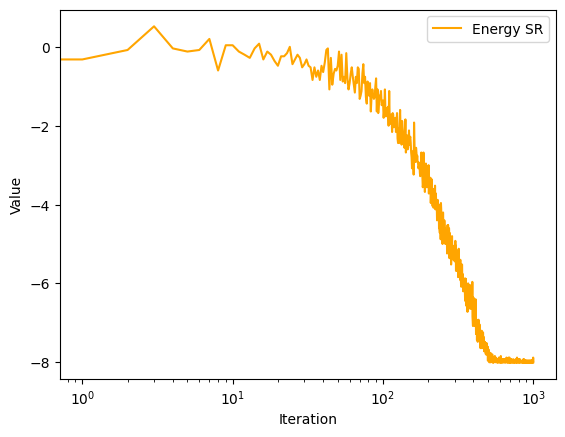

In [7]:
#plt.errorbar(
#    np.arange(len(results_vmc['energies'])),
#    results_vmc['energies'],
#    yerr=np.sqrt(results_vmc['variances']),
#    label='Energy VMC',
#    ecolor='tab:blue',
#    elinewidth=2,
#    alpha=0.2,
#    capsize=1
#)

#plt.errorbar(
#    np.arange(len(results_sr['energies'])),
#    (results_sr['energies']),
#    yerr=np.sqrt(results_sr['variances']),
#    label='Energy SR',
#    ecolor='tab:orange',
#    elinewidth=2,
#    alpha=0.2,
#    capsize=1
#)
plt.xscale('log')
#plt.plot(results_vmc['energies'], label='Energy VMC', color='blue')
plt.plot(results_sr['energies'], label='Energy SR', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [8]:
#print(m_sampler.sample(wave)[0])
print(m_sampler_1.sample(wave_1)[0])
#print(m_sampler_1.sample(wave_1))
energies = ham.local_energy(m_sampler_1.current_state, wave_1)
mean = tf.reduce_mean(energies)
variance = tf.math.reduce_variance(energies)
print("Mean energy:", mean.numpy())
print("Variance:", variance.numpy())

tf.Tensor([0. 1. 0. 1. 0. 1. 0. 1.], shape=(8,), dtype=float32)
Mean energy: (-8+0j)
Variance: 0.0


In [9]:
L = 8
n_spins = L * L
density = 2
n_hidden_spins = int(L * density)

In [10]:
wave_2 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_visible=0.01, std_hidden=0.01, std_weights=0.01)
m_sampler_2 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)
#print("Initial state:", m_sampler.current_state)

opt_2 = optimizer.StochasticReconfiguration(
    wave_function=wave_2,
    hamiltonian=ham,
    sampler=m_sampler_2,
    learning_rate=0.01,
    epsilon=0.001,
)

In [11]:
results_sr_2 = opt_2.train(n_iterations=1000)

/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py:315: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(self._numpy())


Iteration 0: Energy = -0.040000+0.000000j, Variance = 7.838400+0.000000j
Iteration 1: Energy = -0.320000+0.000000j, Variance = 6.617600+0.000000j
Iteration 2: Energy = 0.200000+0.000000j, Variance = 9.720000+0.000000j
Iteration 3: Energy = -0.120000+0.000000j, Variance = 8.145600+0.000000j
Iteration 4: Energy = -0.160000+0.000000j, Variance = 7.334400+0.000000j
Iteration 5: Energy = -0.080000+0.000000j, Variance = 7.993600+0.000000j
Iteration 6: Energy = -0.320000+0.000000j, Variance = 6.937600+0.000000j
Iteration 7: Energy = -0.240000+0.000000j, Variance = 7.622399+0.000000j
Iteration 8: Energy = -0.080000+0.000000j, Variance = 7.673600+0.000000j
Iteration 9: Energy = -0.240000+0.000000j, Variance = 7.942399+0.000000j
Iteration 10: Energy = -0.400000+0.000000j, Variance = 7.520000+0.000000j
Iteration 11: Energy = 0.320000+0.000000j, Variance = 7.257600+0.000000j
Iteration 12: Energy = 0.360000+0.000000j, Variance = 8.990400+0.000000j
Iteration 13: Energy = 0.720000+0.000000j, Variance

In [12]:
print(m_sampler_2.sample(wave_1)[0])
energies = ham.local_energy(m_sampler_2.current_state, wave_1)
mean = tf.reduce_mean(energies)
variance = tf.math.reduce_variance(energies)
print("Mean energy:", mean.numpy())
print("Variance:", variance.numpy())

tf.Tensor([0. 1. 0. 1. 0. 1. 0. 1.], shape=(8,), dtype=float32)
Mean energy: (-7.96+0j)
Variance: 0.1584


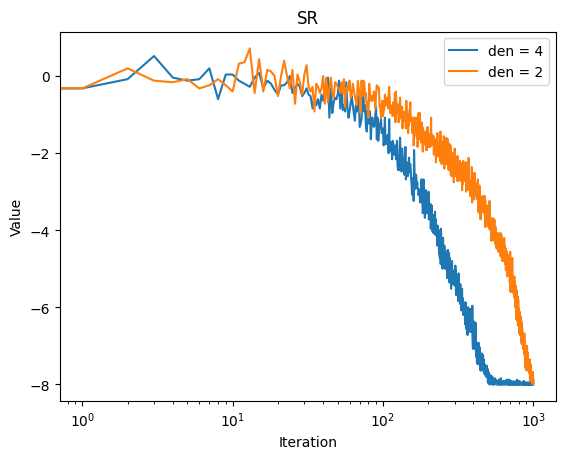

In [26]:
plt.xscale('log')
#plt.plot(results_vmc['energies'], label='Energy VMC', color='blue')
plt.title("SR")
plt.plot(results_sr['energies'], label='den = 4')
plt.plot(results_sr_2['energies'], label='den = 2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [15]:
L = 8
n_spins = L * L
density = 4
n_hidden_spins = int(L * density)

In [16]:
wave_3 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_visible=0.01, std_hidden=0.01, std_weights=0.01)
m_sampler_3 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)

opt_3 = optimizer.VMC(
    wave_function=wave_3,
    hamiltonian=ham,
    sampler=m_sampler_3,
    learning_rate=0.01,
)

In [17]:
result_vmc = opt_3.train(n_iterations=1000)

/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py:315: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(self._numpy())


Iteration 0: Energy = -0.080000+0.000000j, Variance = 8.313600+0.000000j
Iteration 1: Energy = -0.320000+0.000000j, Variance = 6.937600+0.000000j
Iteration 2: Energy = -0.360000+0.000000j, Variance = 7.070400+0.000000j
Iteration 3: Energy = 0.440000+0.000000j, Variance = 8.286400+0.000000j
Iteration 4: Energy = 0.000000+0.000000j, Variance = 8.320000+0.000000j
Iteration 5: Energy = -0.040000+0.000000j, Variance = 7.838400+0.000000j
Iteration 6: Energy = -0.520000+0.000000j, Variance = 8.849600+0.000000j
Iteration 7: Energy = -0.440000+0.000000j, Variance = 9.246400+0.000000j
Iteration 8: Energy = 0.200000+0.000000j, Variance = 9.080000+0.000000j
Iteration 9: Energy = -0.640000+0.000000j, Variance = 8.230400+0.000000j
Iteration 10: Energy = -0.360000+0.000000j, Variance = 7.390400+0.000000j
Iteration 11: Energy = -0.960000+0.000000j, Variance = 8.998400+0.000000j
Iteration 12: Energy = -1.440000+0.000000j, Variance = 7.846400+0.000000j
Iteration 13: Energy = -0.840000+0.000000j, Varianc

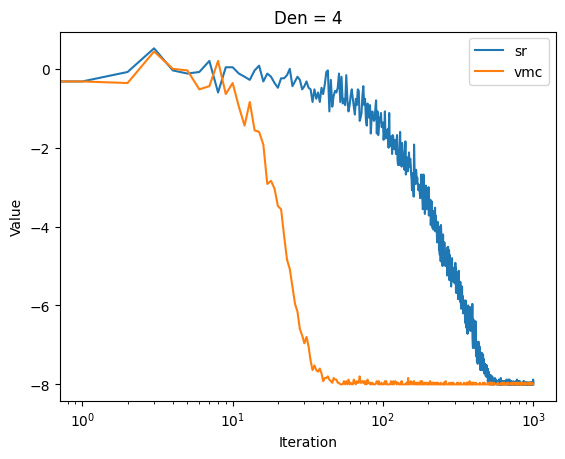

In [24]:
plt.xscale('log')
plt.title("Den = 4")
plt.plot(results_sr['energies'], label='sr')
plt.plot(result_vmc['energies'], label='vmc')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [19]:
L = 8
n_spins = L * L
density = 2
n_hidden_spins = int(L * density)

In [20]:
wave_4 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_visible=0.01, std_hidden=0.01, std_weights=0.01)
m_sampler_4 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)

opt_4 = optimizer.VMC(
    wave_function=wave_4,
    hamiltonian=ham,
    sampler=m_sampler_4,
    learning_rate=0.01,
)

In [21]:
result_vmc_2 = opt_4.train(n_iterations=1000)

/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py:315: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(self._numpy())


Iteration 0: Energy = -0.480000+0.000000j, Variance = 9.049600+0.000000j
Iteration 1: Energy = 0.480000+0.000000j, Variance = 7.129600+0.000000j
Iteration 2: Energy = 0.080000+0.000000j, Variance = 7.993599+0.000000j
Iteration 3: Energy = 0.000000+0.000000j, Variance = 8.640000+0.000000j
Iteration 4: Energy = -0.320000+0.000000j, Variance = 7.257601+0.000000j
Iteration 5: Energy = 0.040000+0.000000j, Variance = 7.198400+0.000000j
Iteration 6: Energy = 0.200000+0.000000j, Variance = 8.759999+0.000000j
Iteration 7: Energy = 0.000000+0.000000j, Variance = 7.680000+0.000000j
Iteration 8: Energy = 0.640000+0.000000j, Variance = 6.630400+0.000000j
Iteration 9: Energy = -0.160000+0.000000j, Variance = 8.934400+0.000000j
Iteration 10: Energy = 0.360000+0.000000j, Variance = 8.030399+0.000000j
Iteration 11: Energy = 0.120000+0.000000j, Variance = 6.865601+0.000000j
Iteration 12: Energy = -0.280000+0.000000j, Variance = 7.441600+0.000000j
Iteration 13: Energy = -0.200000+0.000000j, Variance = 7.

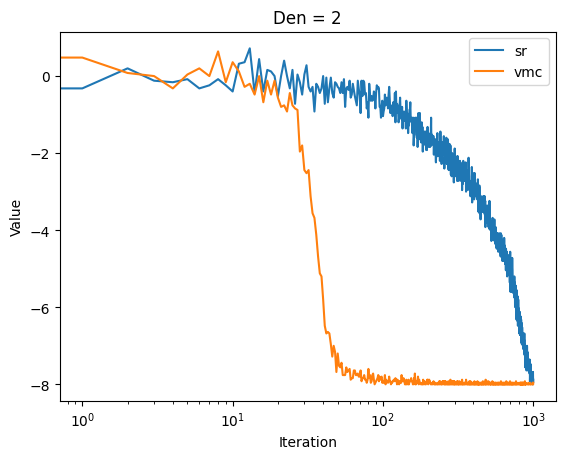

In [23]:
plt.xscale('log')
plt.title("Den = 2")
plt.plot(results_sr_2['energies'], label='sr')
plt.plot(result_vmc_2['energies'], label='vmc')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

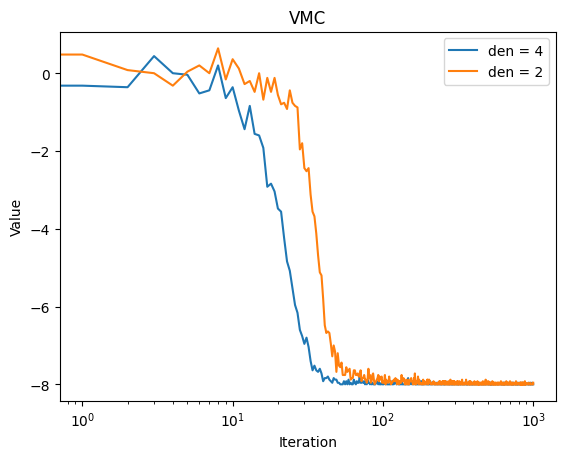

In [25]:
plt.xscale('log')
plt.title("VMC")
plt.plot(result_vmc['energies'], label='den = 4')
plt.plot(result_vmc_2['energies'], label='den = 2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()